In [114]:
import pandas as pd
import numpy as np
from scipy import stats
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from ast import literal_eval
%matplotlib inline

In [115]:
# load the pre-calculated cluster/super cluster assignments for all Kadist tagged works
df = pd.read_csv('results/kadist_assignments.csv')

# convert list coluumns to actual lists
for col in ['user_tags', 'clusters_formatted', 'superclusters_formatted', 'superclusters_no_scores', 'clusters_no_scores']:
    df[col] = df[col].apply(lambda x: literal_eval(x))
df.head()

,artist_name,description,artist_description,title,region,user_tags,image_url,thumbnail,permalink,clusters_formatted,clusters_no_scores,clusters_sum_of_scores,superclusters_formatted,superclusters_no_scores,superclusters_sum_of_scores
0,"Jennifer Allora, Guillermo Calzadilla",This series of photographs is part of the body...,Jennifer Allora and Guillermo Calzadilla compr...,Land Mark (Foot Prints) #12,Americas,"[demobilization.n.01, landscape.n.03, footprin...",https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/work/land-mark-foot-prints-12/,"[Arts/4.0318627450980395, Inequality/1.6985294...","[Arts, Inequality, Land]",6.730392,"[Cultural/4.920751633986928, Politics/2.467760...","[Cultural, Politics, Society]",9.138512
1,Gabriel Kuri,Gabriel Kuri has created a series of works in ...,"Gabriel Kuri works from repurposed natural, in...",Untitled (Ticket Roll),Unspecified,"[everyday.s.03, ostentatious.a.01, juxtapositi...",https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/work/untitled-ticket-roll/,"[Immaterial/1.0, Time/1.0, Community/0.8]","[Immaterial, Time, Community]",2.800000,"[Material_Physical/2.0, Society/1.6, Politics/...","[Material_Physical, Society, Politics]",5.200000
2,Renee Rhodes,The artist writes about her work: “There is an...,Renée Rhodes grew up amidst the fantasy and ri...,Moving Clocks Change Rhythm,Americas,"[map.v.02, choreography.n.02, perspective.n.02...",https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/work/moving-clocks-change-r...,"[Arts/4.1495098039215685, Mind/2.4888888888888...","[Arts, Mind, Language]",9.007629,"[Cultural/9.621304675716441, Individual_Person...","[Cultural, Individual_Personal, Society]",17.675029
3,Fiamma Montezemolo,Montemozolo writes of the work: “Fireflies is ...,"Born in Rome, Fiamma Montezemolo is both a cul...",Fireflies,Americas,"[survival.n.01, adjust.v.03, surprise.n.02, ca...",https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/work/fireflies/,"[Body/2.58021978021978, Time/1.780219780219780...","[Body, Time, Materiality]",5.898901,"[Individual_Personal/4.118681318681318, Materi...","[Individual_Personal, Material_Physical, Society]",9.006593
4,Mladen Stilinovic,The Exploitation of the Dead cycle is composed...,Mladen Stilinovic’s work is based on social an...,Exploitation of the Dead,Europe,"[obsoleteness.n.01, meaning.n.01, collection.n...",https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/work/exploitation-of-the-dead/,"[Arts/1.675, Design/1.6470588235294117, Media/...","[Arts, Design, Media]",4.255392,"[Cultural/5.944281045751634, Individual_Person...","[Cultural, Individual_Personal, Material_Physi...",11.744281


# Breakdown by superclusters & clusters 


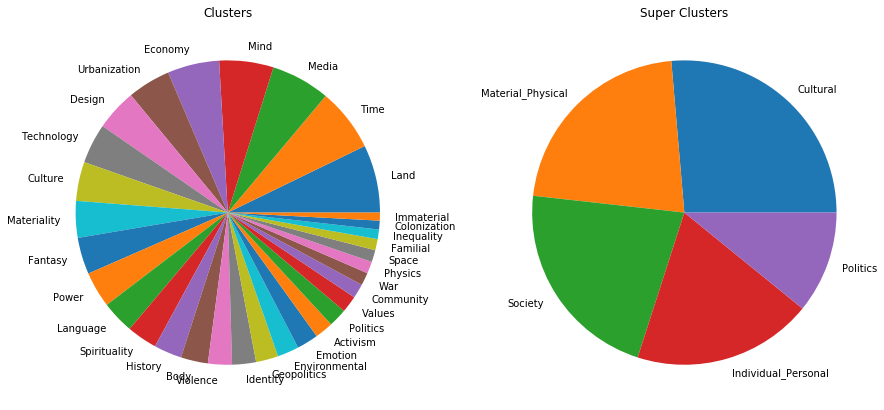

In [147]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7.5))

ax1.axis("off"); ax2.axis("off")
ax1.set_title('Clusters')
ax2.set_title('Super Clusters')

pd.Series(df.clusters_no_scores.sum()).value_counts()[1:].plot.pie(ax=ax1);
pd.Series(df.superclusters_no_scores.sum()).value_counts().plot.pie(ax=ax2);


# Analysis of poor performing tags

Most popular tags that produce low cluster scores, ie have low affinity to any cluster

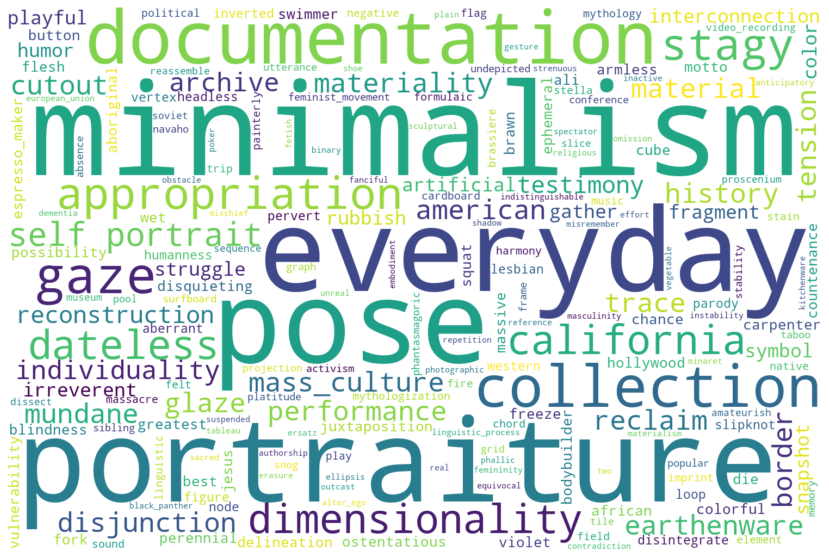

In [120]:
df_low_corr_works = df[df.clusters_sum_of_scores < df.clusters_sum_of_scores.mean()/2]

tags = df_low_corr_works.user_tags.sum()

wc = WordCloud(
    background_color='white',
    colormap = 'viridis',
    width=1500, 
    height=1000, 
    random_state=42).generate(' '.join([x.split('.')[0] for x in tags]))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [126]:
pd.Series(tags).value_counts().head(15)

minimalism.n.01       5
collection.n.01       4
documentation.n.01    4
portraiture.n.02      4
pose.n.02             4
everyday.s.03         4
appropriation.n.03    3
self-portrait.n.01    3
stagy.s.01            3
california.n.01       3
gaze.n.01             3
trace.n.02            2
earthenware.n.01      2
humor.n.04            2
mundane.s.02          2
dtype: int64